<a href="https://colab.research.google.com/github/SachinScaler/Apr24_TimeSeries_and_RecSys/blob/main/Time_Series_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 29.0MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### set default figsize
plt.rcParams['figure.figsize'] = (14,6)

mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head(13)

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
5,2001-06-01,8104.0
6,2001-07-01,7813.0
7,2001-08-01,8279.0
8,2001-09-01,7014.0
9,2001-10-01,7985.0


In [ ]:
mobile_sales.tail()

,DATE,Sales
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0
216,2019-01-01,12160.0


In [ ]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [ ]:
18*12+1

217

- All the date entries are present

#### pd.to_datetime() Can be used to convert non-datetime columnns into dt cols

In [ ]:
mobile_sales.describe()

,DATE,Sales
count,217,198.000000
mean,2009-12-31 04:25:26.267281152,10842.757576
min,2001-01-01 00:00:00,108.000000
25%,2005-07-01 00:00:00,8856.000000
50%,2010-01-01 00:00:00,10745.000000
75%,2014-07-01 00:00:00,12399.750000
max,2019-01-01 00:00:00,23740.000000
std,NaN,2605.006293


In [ ]:
mobile_sales.set_index('DATE', inplace =True)
mobile_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


- Hourly, minutes, second based observation
- Daily Gap
- Weekly Observation
- Monthly Observation
- Quarterly Observation
- Annual Observation
- 5 year Observation

<Axes: xlabel='DATE'>

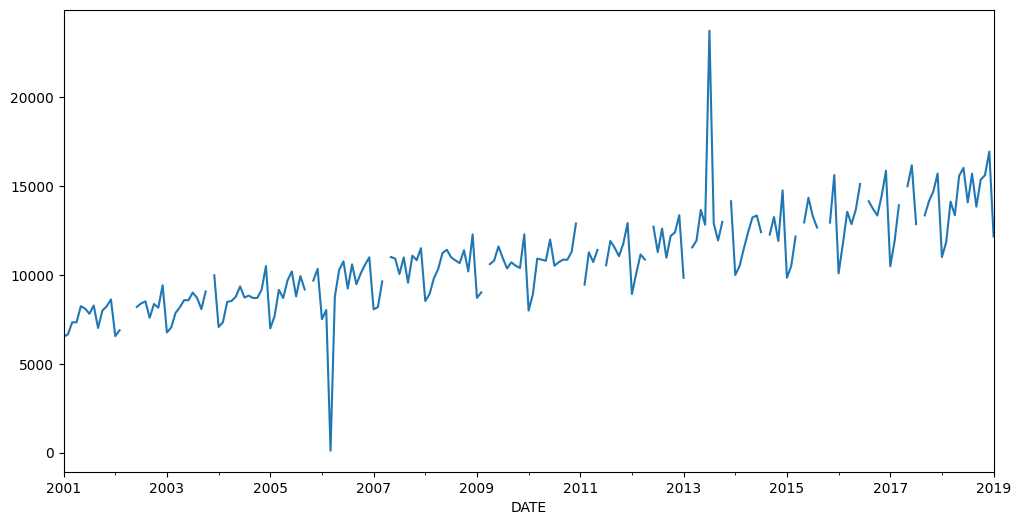

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
mobile_sales.Sales.plot()

### How can we handle Missing Values:

What shall we impute/fill missing values with?

In [ ]:
### linear interpolation code

mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')


<Axes: xlabel='DATE'>

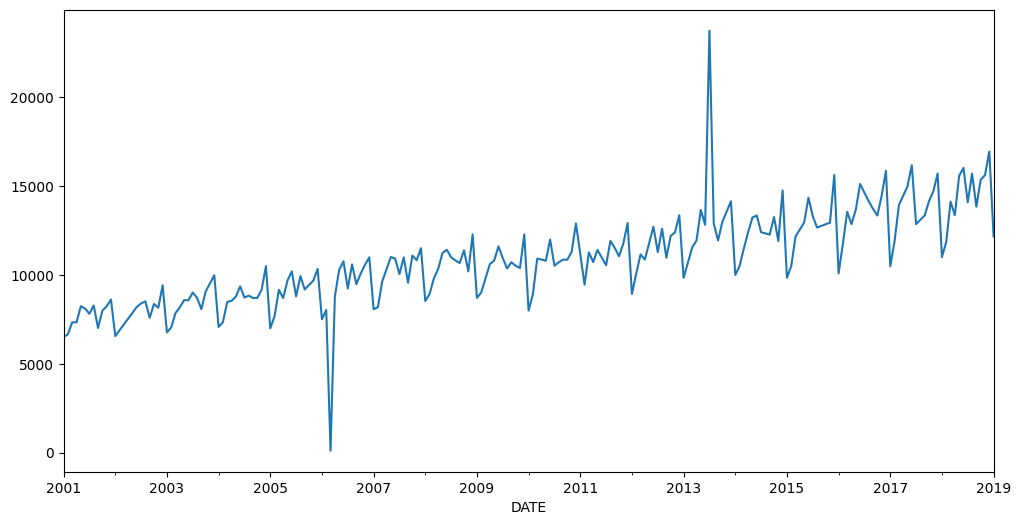

In [ ]:
import matplotlib.pyplot as plt

mobile_sales.Sales.plot(figsize=(12,6))

[]

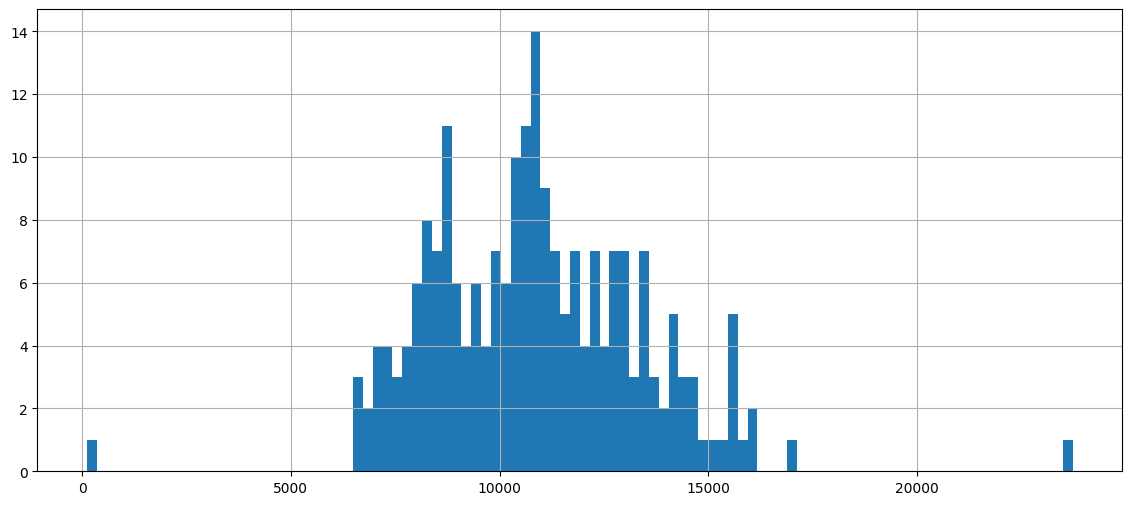

In [ ]:
### let's visualize distribution of sales
mobile_sales.Sales.hist(bins=100).plot()

### <0.02 and 0.98>

In [ ]:
lower = mobile_sales.Sales.quantile(0.02)
lower

6802.44

In [ ]:
upper = mobile_sales.Sales.quantile(0.98)
upper

15809.400000000001

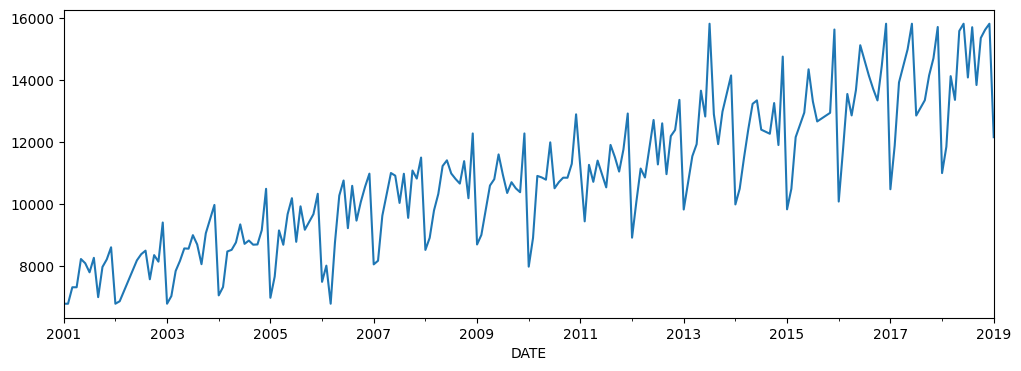

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

mobile_sales.Sales = mobile_sales.Sales.clip(upper = upper, lower = lower)
mobile_sales.Sales.plot(figsize=(12,4))
plt.show()

In [ ]:
import statsmodels

### Moving Average in Pandas
Let's Calculate rolling mean/avg

In [ ]:
window_size=3 # window size -1 values will be nan
mobile_sales.Sales.rolling(window_size).mean()

DATE
2001-01-01             NaN
2001-02-01             NaN
2001-03-01     6978.960000
2001-04-01     7155.480000
2001-05-01     7634.666667
                  ...     
2018-09-01    14538.333333
2018-10-01    14962.000000
2018-11-01    14934.666667
2018-12-01    15591.800000
2019-01-01    14528.133333
Name: Sales, Length: 217, dtype: float64

<Axes: xlabel='DATE'>

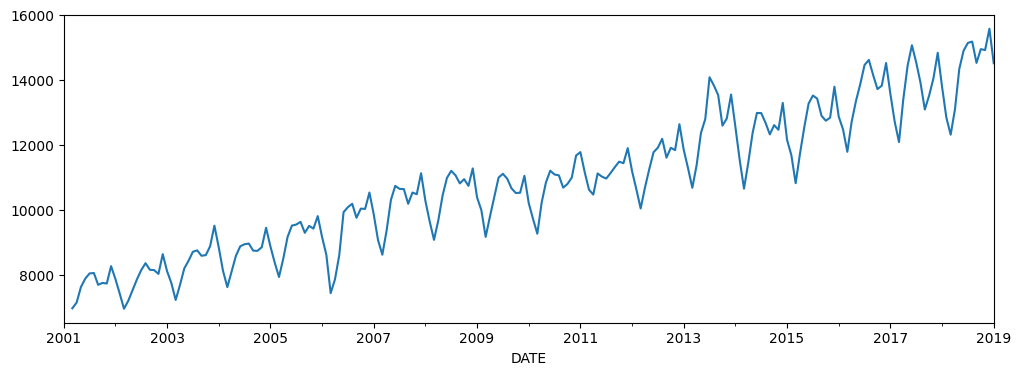

In [ ]:
ma = mobile_sales.Sales.rolling(window_size, center=False).mean()
ma.plot(label='smoothed', figsize=(12,4))

<Axes: xlabel='DATE'>

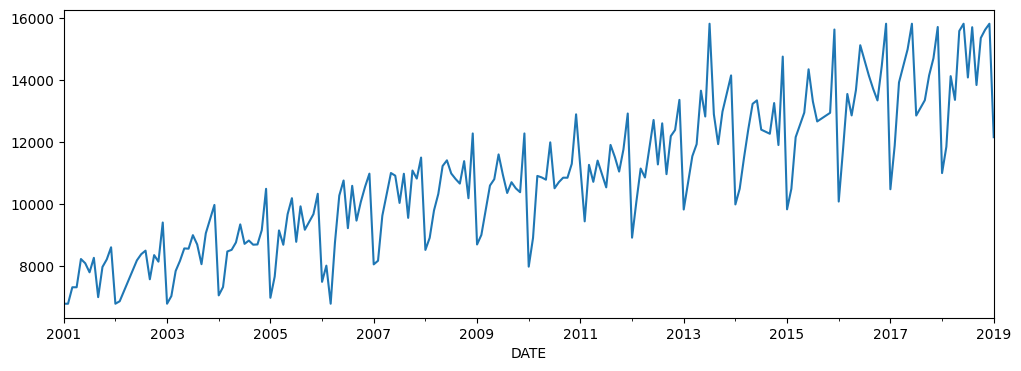

In [ ]:
mobile_sales.Sales.plot(figsize=(12,4))

<Axes: xlabel='DATE'>

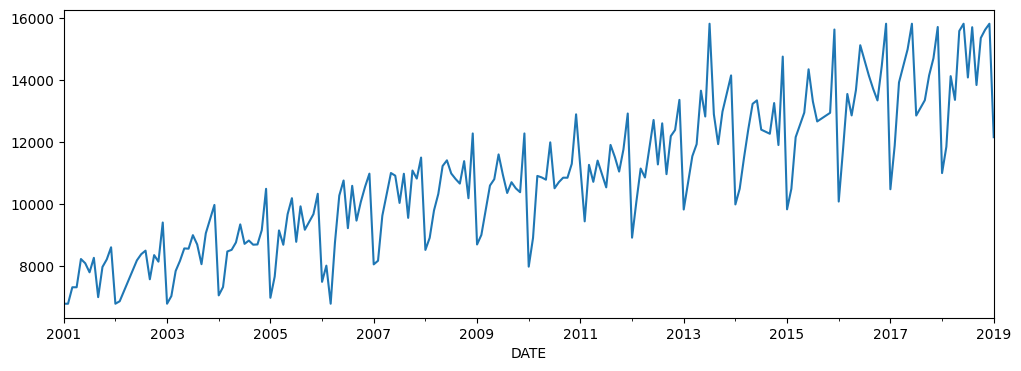

In [ ]:
window_size=1
mobile_sales.Sales.rolling(window_size, center=False).mean().plot(label='smoothed', figsize=(12,4))

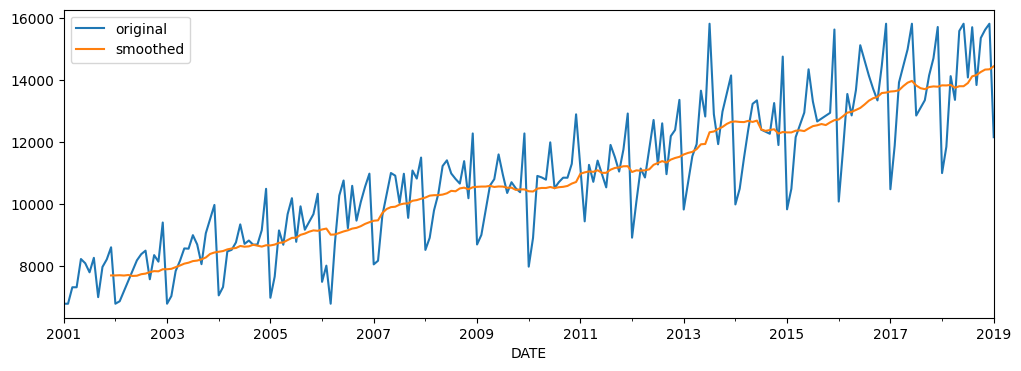

In [ ]:
window_size=12
# Plot original data
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(window_size, center=False).mean().plot(label='smoothed', figsize=(12,4))
plt.legend()

### Centered MA

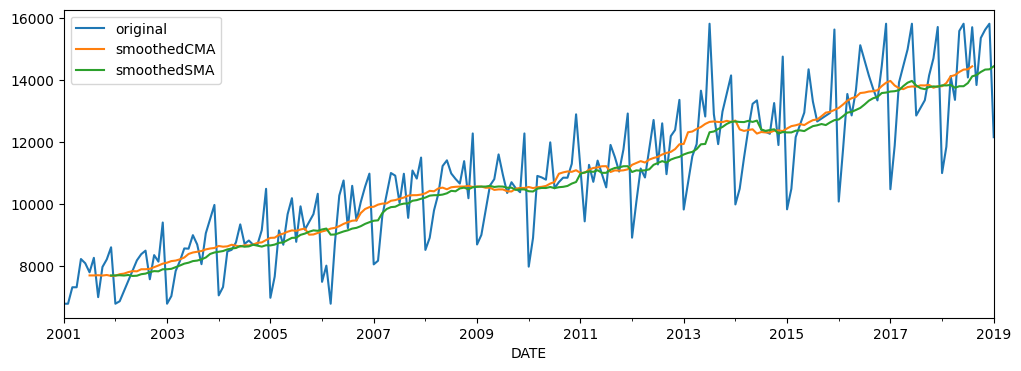

In [ ]:
window_size=12
# Plot original data
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(window_size, center=True).mean().plot(label='smoothedCMA', figsize=(12,4))
mobile_sales.Sales.rolling(window_size, center=False).mean().plot(label='smoothedSMA', figsize=(12,4))

plt.legend()

#### Subtract trend from original sales and plot

<Axes: xlabel='DATE'>

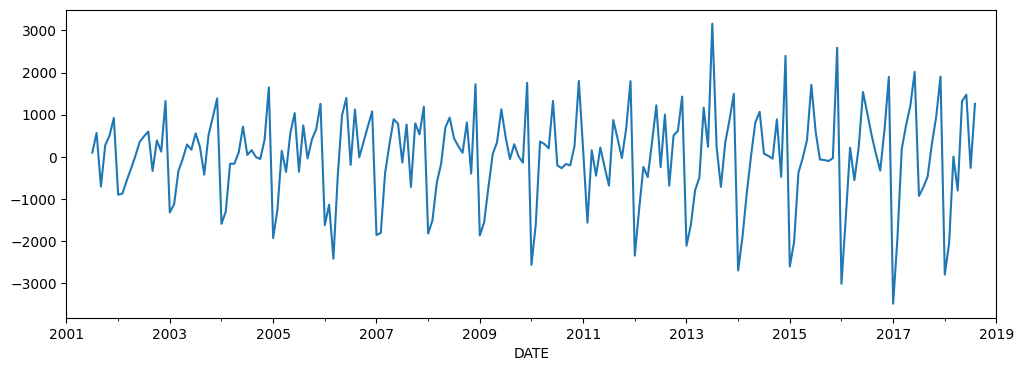

In [ ]:
yt = mobile_sales.Sales.rolling(window_size, center=True).mean()
st_et =  mobile_sales.Sales - yt
st_et.plot(figsize=(12,4))

### Let's do time series decomposition with statsmodel

In [ ]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

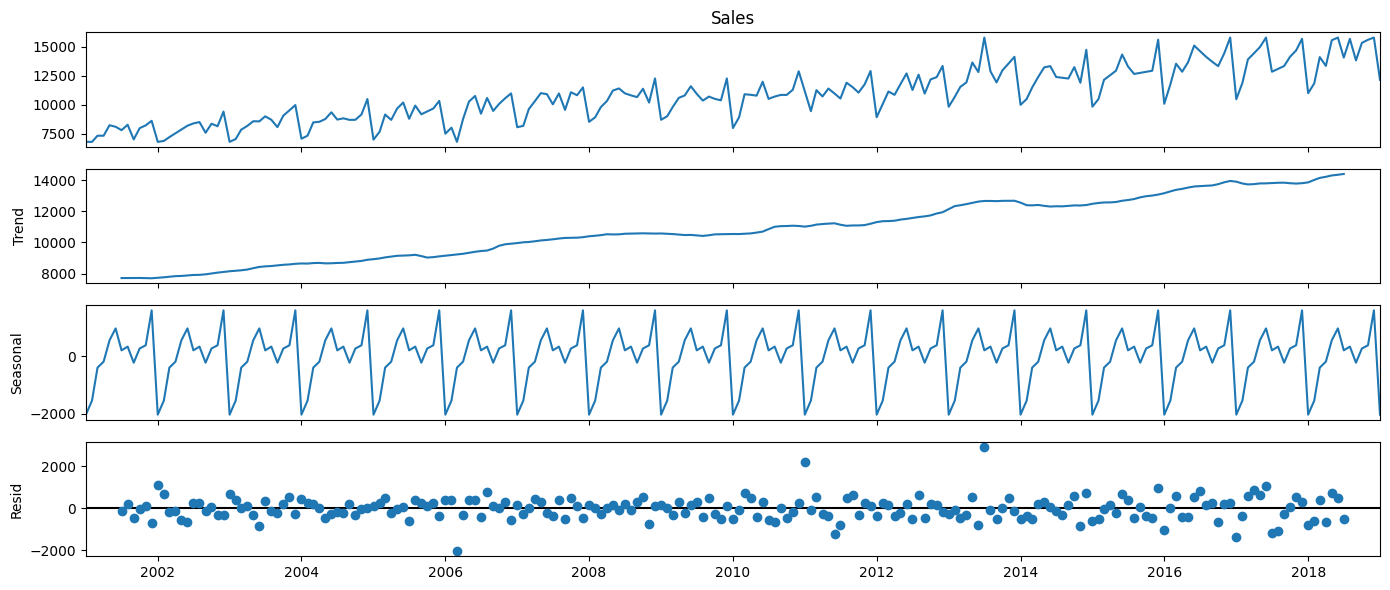

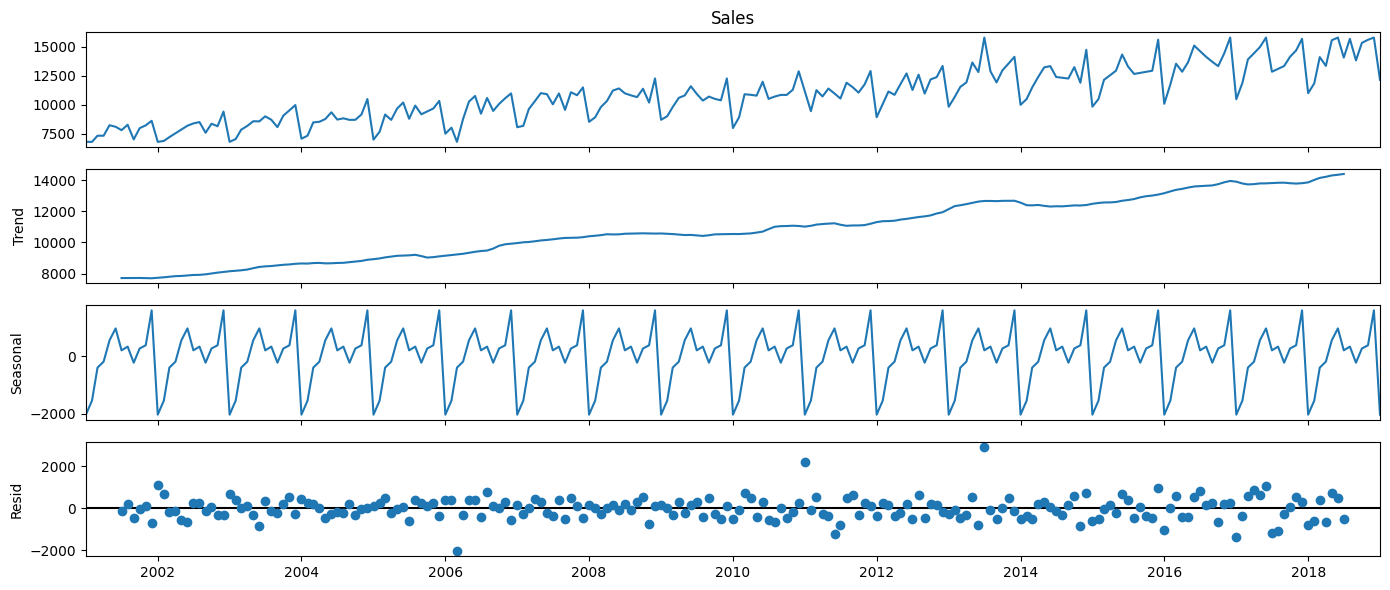

In [ ]:
model.plot()

<Axes: xlabel='DATE'>

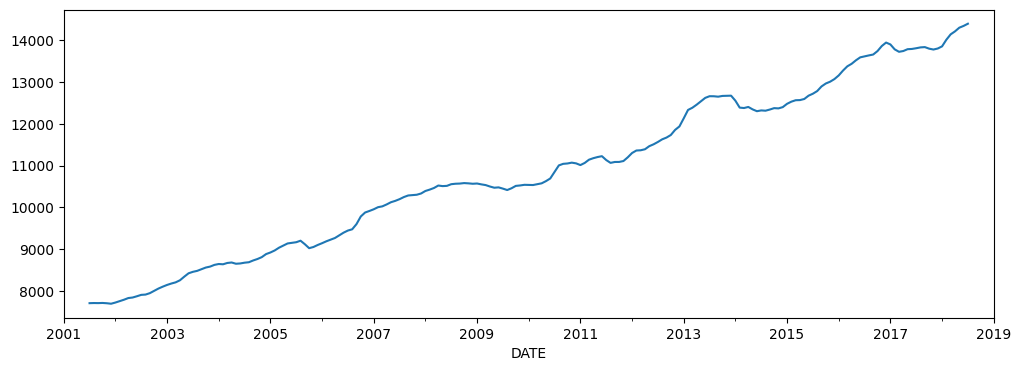

In [ ]:
model.trend.plot(figsize=(12,4))

<Axes: xlabel='DATE'>

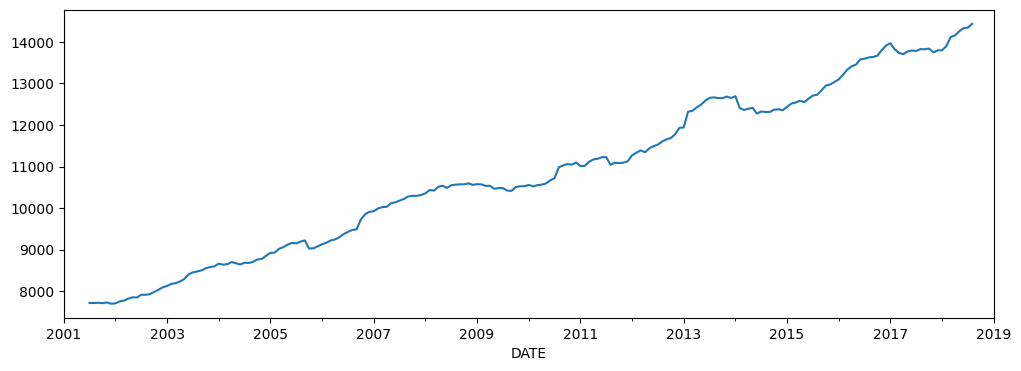

In [ ]:
window_size=12
mobile_sales.Sales.rolling(window_size, center=True).mean().plot(label='smoothed', figsize=(12,4))

<Axes: xlabel='DATE'>

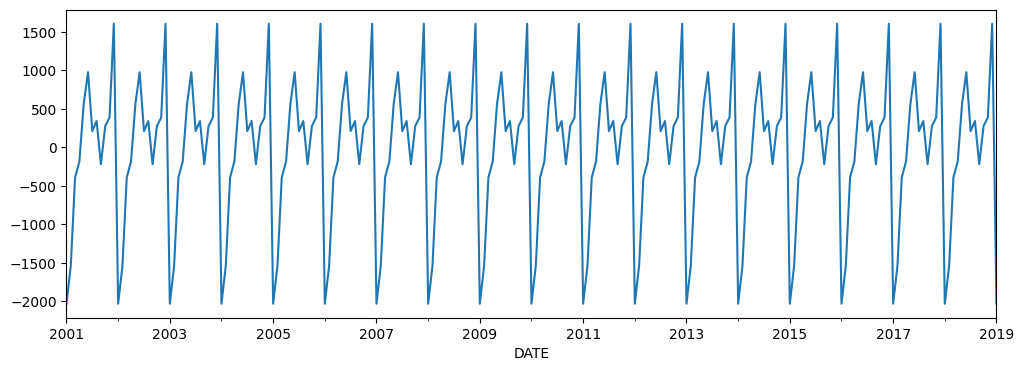

In [ ]:
model.seasonal.plot(figsize=(12,4))

<Axes: xlabel='DATE'>

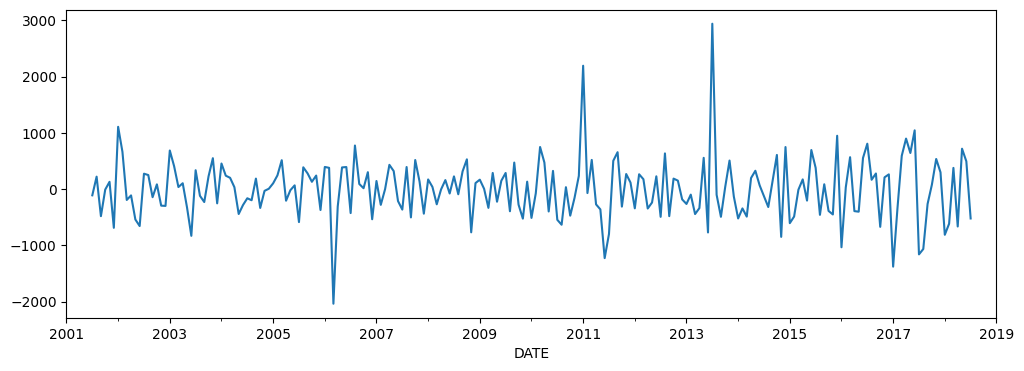

In [ ]:
model.resid.plot(figsize=(12,4))

<Axes: >

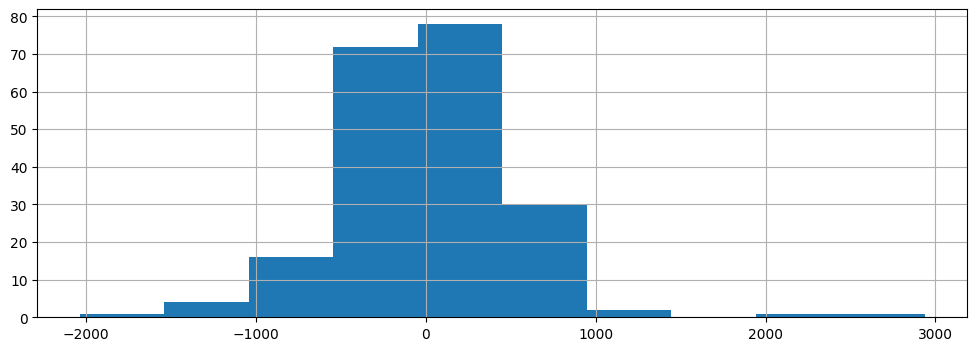

In [ ]:
model.resid.hist(figsize=(12,4))

In [ ]:
model.resid.mean()

-3.2316417029771514

### Agenda 2: Forecast with MAPE <=5

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)


### Creating function to measure and print all three metric
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

performance([100], [98])

MAE : 2.0
RMSE : 2.0
MAPE: 0.02


In [ ]:
mobile_sales.Sales.mean()

10862.567741935485

### Train Test Split

- let's select last 12 months as test

In [ ]:
int(len(mobile_sales)*0.2)

43

In [ ]:
train_max_date = mobile_sales.index[-12]
train_max_date

Timestamp('2018-02-01 00:00:00')

### Slicing and select all values before the max_date into training and remaining into test

In [ ]:
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()


In [ ]:
train_x

,Sales
DATE,
2001-01-01,6802.44
2001-02-01,6802.44
2001-03-01,7332.00
2001-04-01,7332.00
2001-05-01,8240.00
...,...
2017-09-01,13349.00
2017-10-01,14150.00
2017-11-01,14698.00


In [ ]:
test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


In [ ]:
preds = train_x.Sales.mean()
preds

10653.201951219511

In [ ]:
test_x['pred'] = preds

<Axes: xlabel='DATE'>

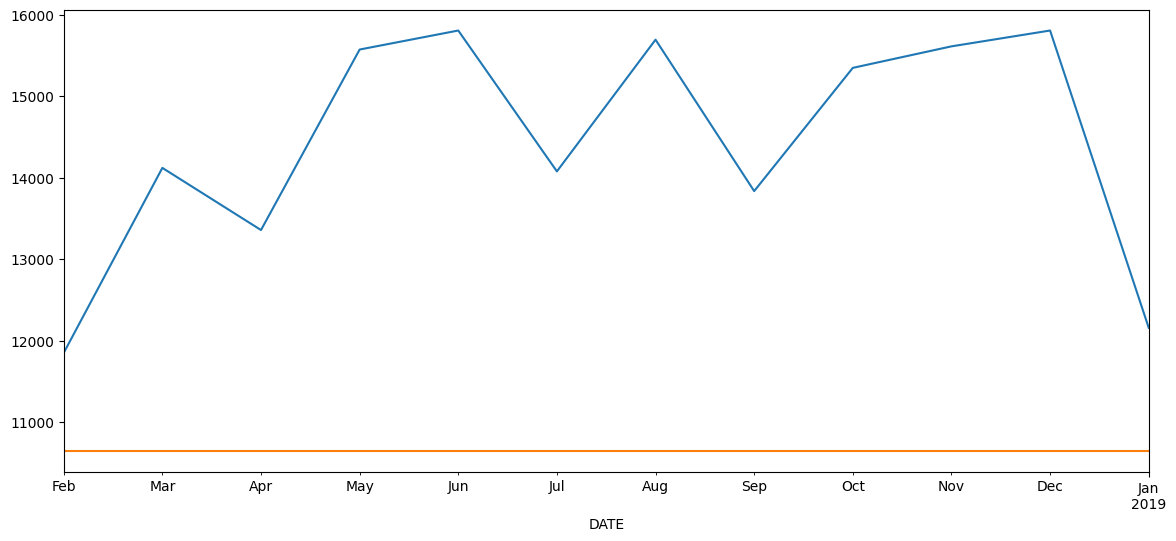

In [ ]:
test_x['Sales'].plot(label='original')
test_x['pred'].plot(label="mean_preds")

In [ ]:
performance(test_x['Sales'], test_x['pred'])

MAE : 3786.031
RMSE : 4025.906
MAPE: 0.255


### Simple Naive

MAE : 3434.233
RMSE : 3697.005
MAPE: 0.23


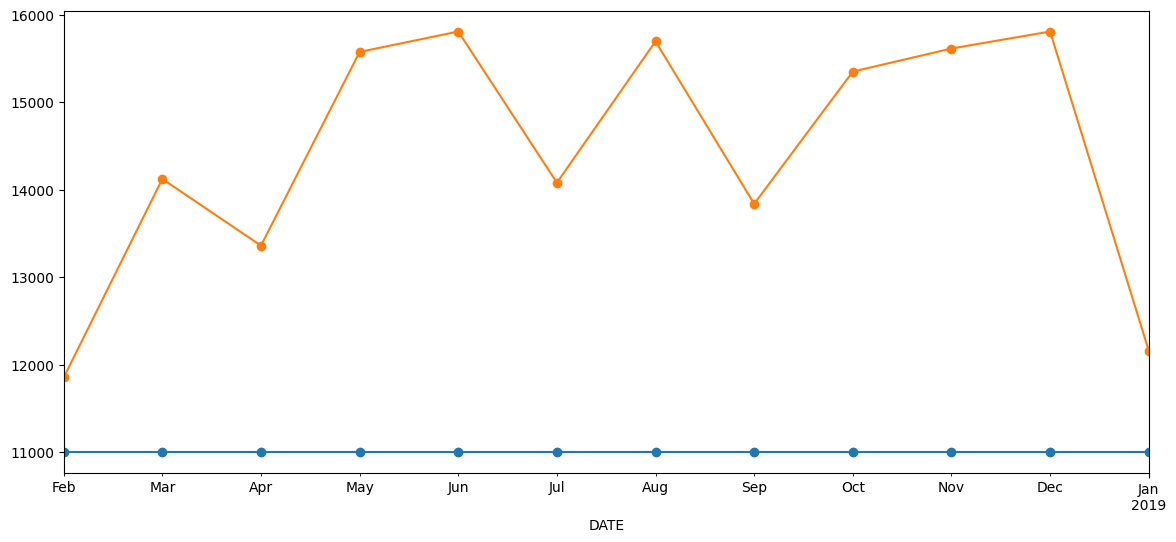

In [ ]:
test_x['pred'] = train_x['Sales'][-1]
test_x['pred'].plot(label="mean_preds", style= '-o')
test_x['Sales'].plot(label='original', style='-o')
performance(test_x['Sales'], test_x['pred'])

In [ ]:
### Naive seasonal

for i in test_x.index:
    test_x.loc[i]['pred'] = train_x.loc[i-pd.DateOffset(years=1)]['Sales']

test_x

<ipython-input-43-fda6bbe8eaf5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.loc[i]['pred'] = train_x.loc[i-pd.DateOffset(years=1)]['Sales']


,Sales,pred
DATE,,
2018-02-01,11852.0,11005.0
2018-03-01,14123.0,11005.0
2018-04-01,13360.0,11005.0
2018-05-01,15576.0,11005.0
2018-06-01,15809.4,11005.0
2018-07-01,14080.0,11005.0
2018-08-01,15697.0,11005.0
2018-09-01,13838.0,11005.0
2018-10-01,15351.0,11005.0


In [ ]:
test_x['pred']=train_x.iloc[-12:]['Sales'].values
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,11891.0
2018-03-01,14123.0,13921.0
2018-04-01,13360.0,14453.5
2018-05-01,15576.0,14986.0
2018-06-01,15809.4,15809.4
2018-07-01,14080.0,12856.0
2018-08-01,15697.0,13102.5
2018-09-01,13838.0,13349.0
2018-10-01,15351.0,14150.0


MAE : 800.867
RMSE : 1067.837
MAPE: 0.055


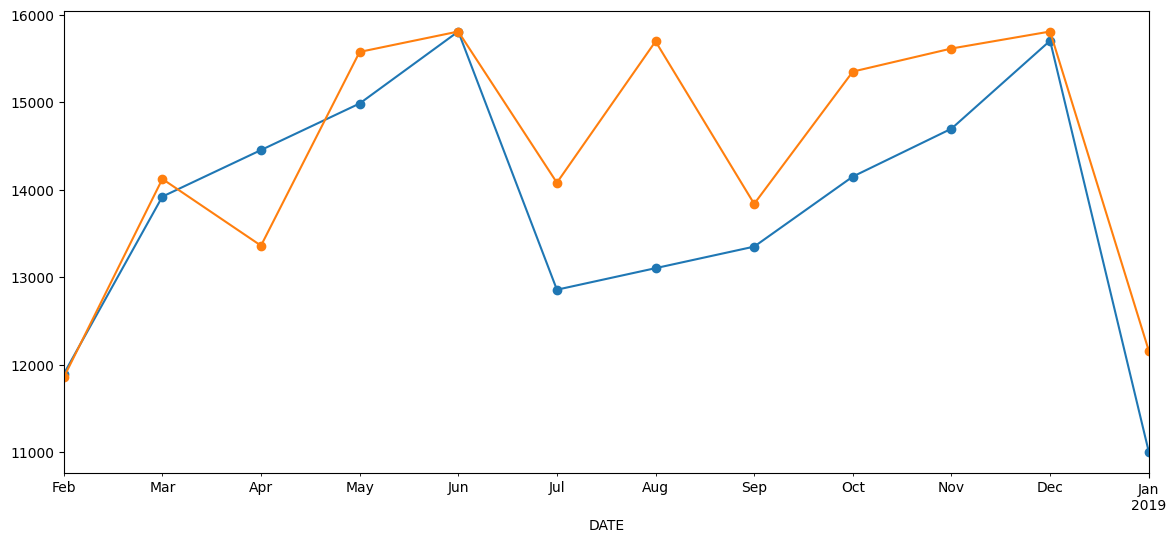

In [ ]:
test_x['pred'].plot(label="mean_preds", style= '-o')
test_x['Sales'].plot(label='original', style='-o')
performance(test_x['Sales'], test_x['pred'])

### In next session:
- drift: focuses on trend only
- smoothing based method for forecasting
- Exponential Smoothing"

### Drift Mehtod

<Axes: xlabel='DATE'>

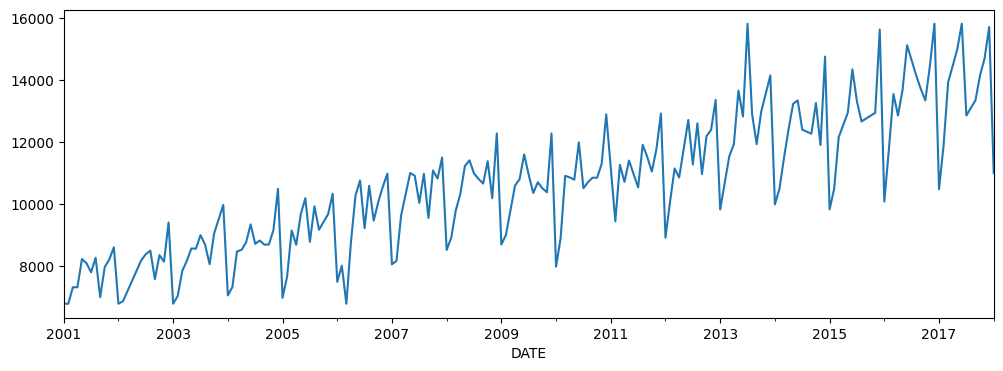

In [ ]:
train_x.Sales.plot(label='original', figsize = (12,4))

In [ ]:
# Get the slope: (last_value - first_value)/Total_values
y_t = train_x['Sales'][-1]
m = (y_t - train_x['Sales'][0]) / len(train_x)
m

20.50029268292683

In [ ]:
import numpy as np

#create h
h = np.linspace(0,len(test_x)-1, len(test_x))

##
h = np.array(range(1,len(test_x)+1))
h

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

MAE : 3300.981
RMSE : 3567.345
MAPE: 0.221


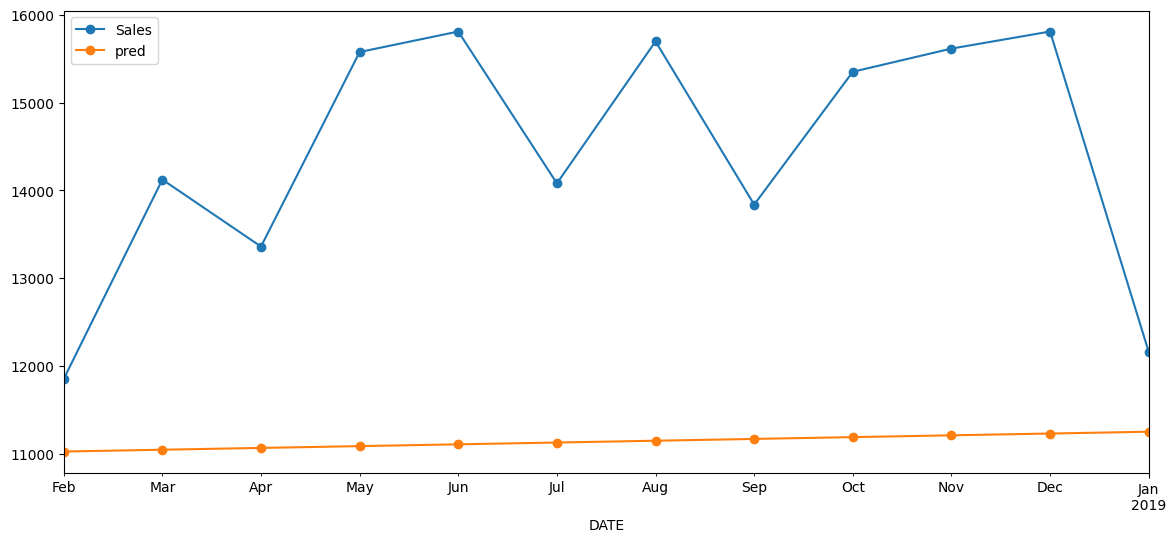

In [ ]:
test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

#### Moving Average

In [ ]:
import numpy as np

df = train_x.copy()

In [ ]:
df.tail()

,Sales
DATE,
2017-09-01,13349.0
2017-10-01,14150.0
2017-11-01,14698.0
2017-12-01,15704.0
2018-01-01,11005.0


In [ ]:
# start= "2018-02-01"
df_with_dates = pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=13,freq='MS'))
df_with_dates

""
2018-01-01
2018-02-01
2018-03-01
2018-04-01
2018-05-01
2018-06-01
2018-07-01
2018-08-01
2018-09-01
2018-10-01



**Note:**
- Notice that we got the first entry as Jan-2019, which already existed in our series.
- In order to take care of this, we need to explicitly mention that we want values from the second index of the result of `pd.date_range()`
- Hence Before adding this into dataframe slice the Series by `[1:]`

In [ ]:
df = pd.concat([df , df_with_dates[1:]])
df.tail(20)

,Sales
2017-06-01,15809.4
2017-07-01,12856.0
2017-08-01,13102.5
2017-09-01,13349.0
2017-10-01,14150.0
2017-11-01,14698.0
2017-12-01,15704.0
2018-01-01,11005.0
2018-02-01,NaN
2018-03-01,NaN


## HOMEWORK TODO:
- Calculate MA Forecast using data in train set with window_size = 3 for next 12 months.
- Store the predictions into TestSet and Compare Performance.

In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,11025.500293
2018-03-01,14123.0,11046.000585
2018-04-01,13360.0,11066.500878
2018-05-01,15576.0,11087.001171
2018-06-01,15809.4,11107.501463
2018-07-01,14080.0,11128.001756
2018-08-01,15697.0,11148.502049
2018-09-01,13838.0,11169.002341
2018-10-01,15351.0,11189.502634


## Exponential Smooting Family(Holt's Winter Models)

### Simple Exponential Smoothing

#### Training

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


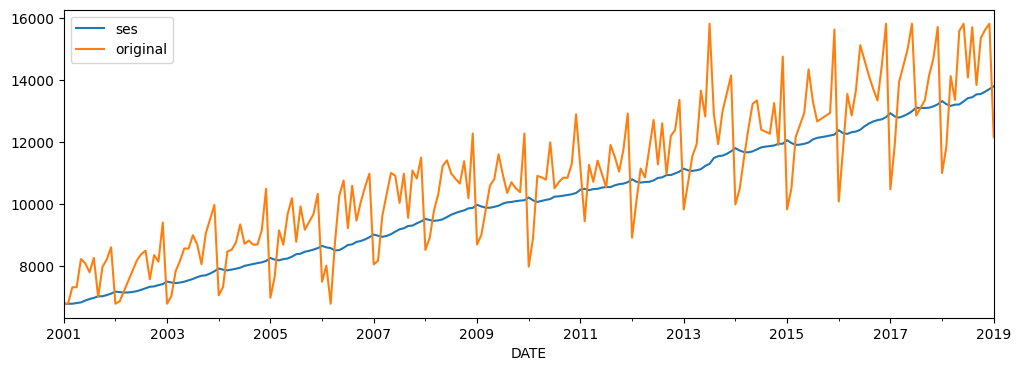

In [ ]:
import statsmodels.api as sm

model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=1/(2*12))
levels = pd.Series(model.fittedvalues)

levels.plot(label='ses', figsize=(12,4))
mobile_sales.Sales.plot(label='original')
plt.legend()

#### Predictions

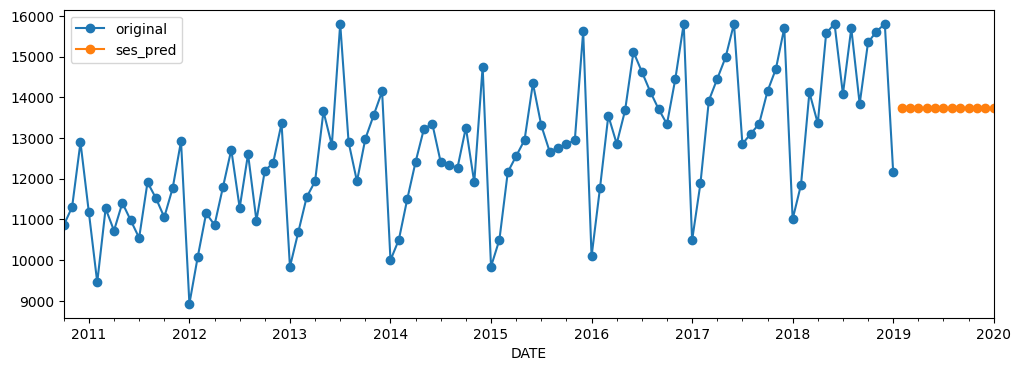

In [ ]:
pred_test = model.forecast(steps = 12)

mobile_sales.Sales.tail(100).plot(label='original', style='-o')

pred_test.plot(label='ses_pred', style='-o',figsize=(12,4))
plt.legend()

### Let's compare the performance by training on trainset and prediction on test set

In [ ]:
### Fit model on train set
model = sm.tsa.SimpleExpSmoothing(train_x.Sales).fit(smoothing_level=1/(2*12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


MAE : 1621.49
RMSE : 1830.741
MAPE: 0.109


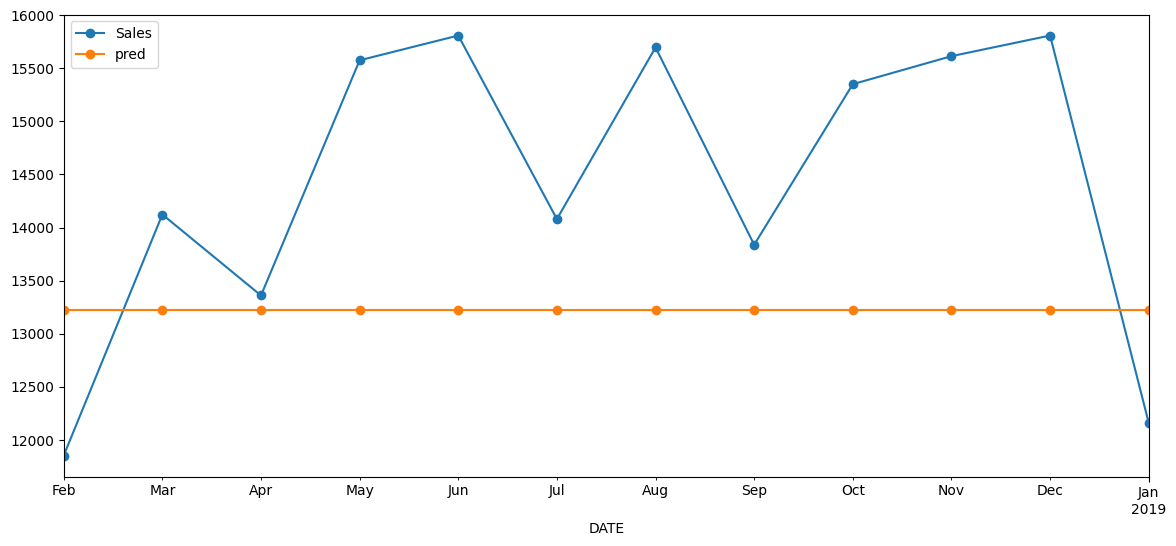

In [ ]:
test_x['pred']=model.forecast(12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

#### DES:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


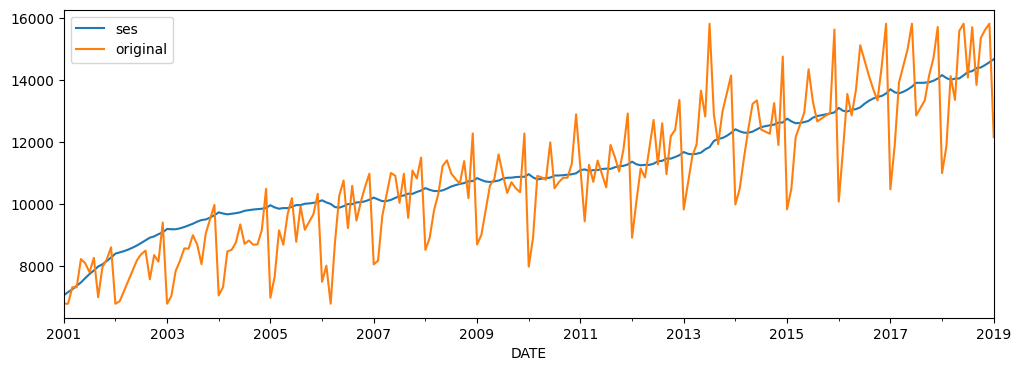

In [ ]:
import statsmodels.api as sm

model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend = 'add').fit(smoothing_level=1/(2*12))
levels = pd.Series(model.fittedvalues)

levels.plot(label='ses', figsize=(12,4))
mobile_sales.Sales.plot(label='original')
plt.legend()

In [ ]:
model.forecast(12)

2019-02-01    14602.623302
2019-03-01    14643.028243
2019-04-01    14683.433184
2019-05-01    14723.838126
2019-06-01    14764.243067
2019-07-01    14804.648009
2019-08-01    14845.052950
2019-09-01    14885.457892
2019-10-01    14925.862833
2019-11-01    14966.267774
2019-12-01    15006.672716
2020-01-01    15047.077657
Freq: MS, dtype: float64

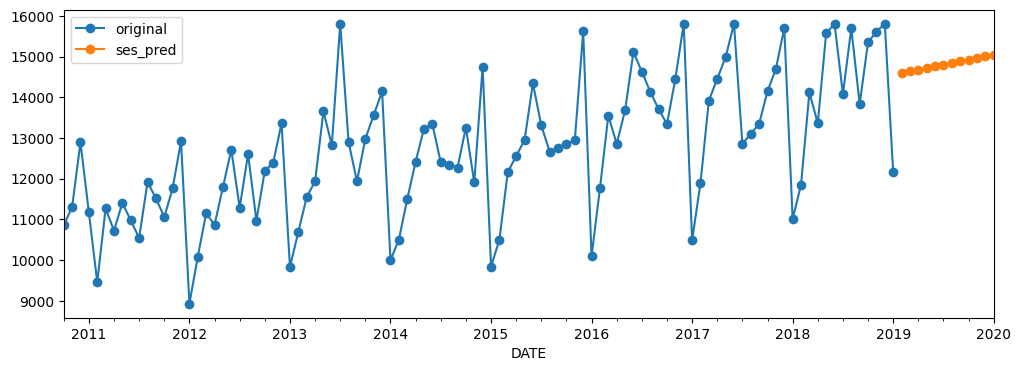

In [ ]:
pred_test = model.forecast(steps = 12)

mobile_sales.Sales.tail(100).plot(label='original', style='-o')

pred_test.plot(label='ses_pred', style='-o',figsize=(12,4))
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAE : 1163.781
RMSE : 1352.497
MAPE: 0.083


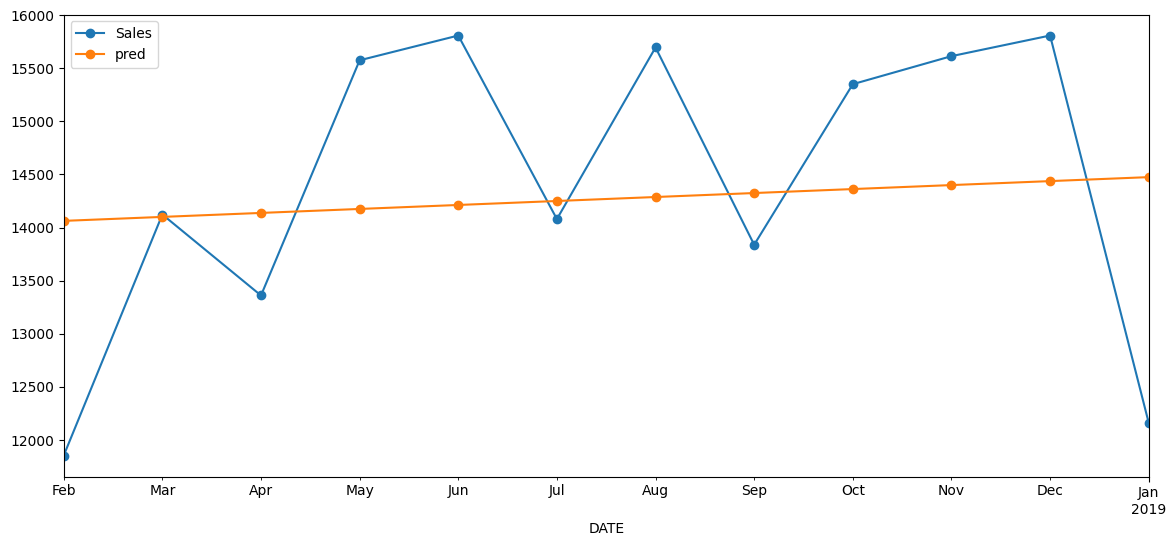

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps = 12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### TES

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


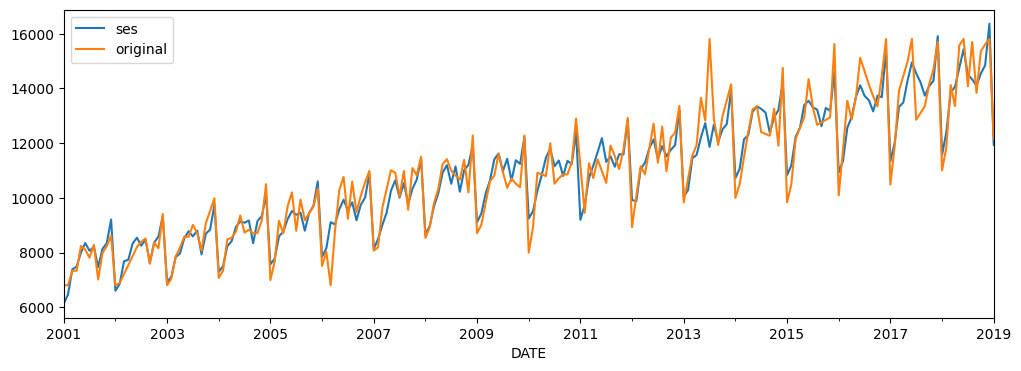

In [ ]:
import statsmodels.api as sm

model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend = 'add', seasonal='add').fit(smoothing_level=1/(2*12))
levels = pd.Series(model.fittedvalues)

levels.plot(label='ses', figsize=(12,4))
mobile_sales.Sales.plot(label='original')
plt.legend()

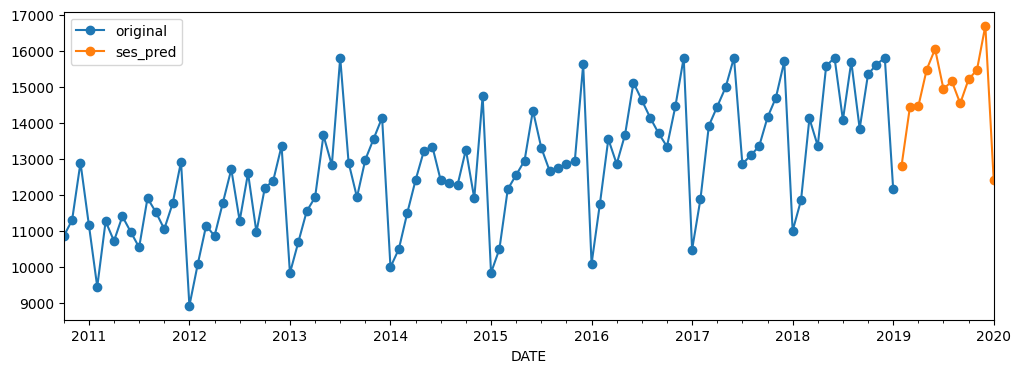

In [ ]:
pred_test = model.forecast(steps = 12)

mobile_sales.Sales.tail(100).plot(label='original', style='-o')

pred_test.plot(label='ses_pred', style='-o',figsize=(12,4))
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 582.172
RMSE : 667.354
MAPE: 0.04


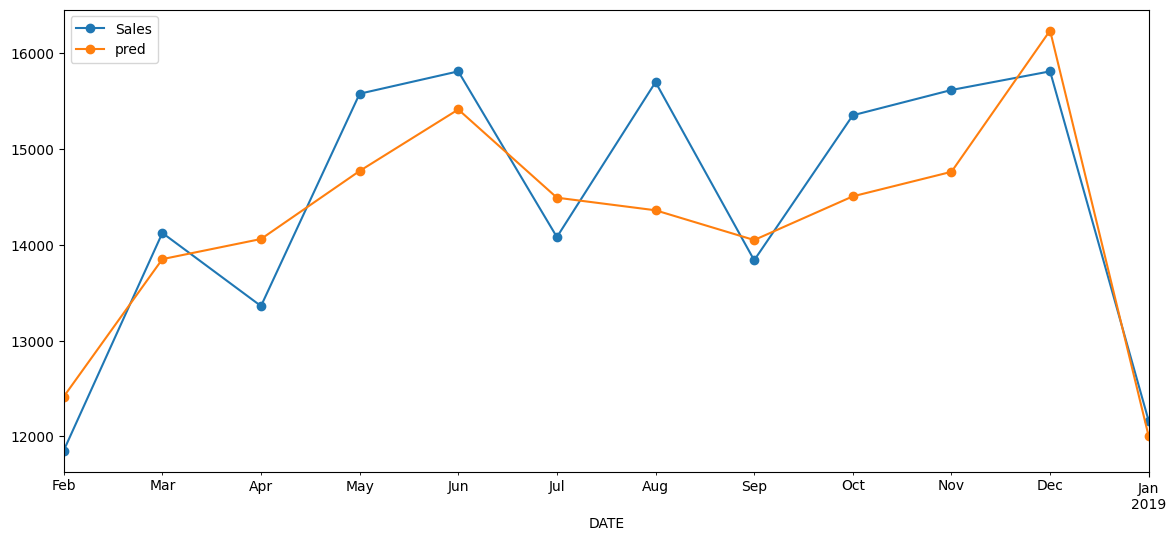

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add', seasonal = 'add').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps = 12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### Question: Which Among following Time Series are Stationary?

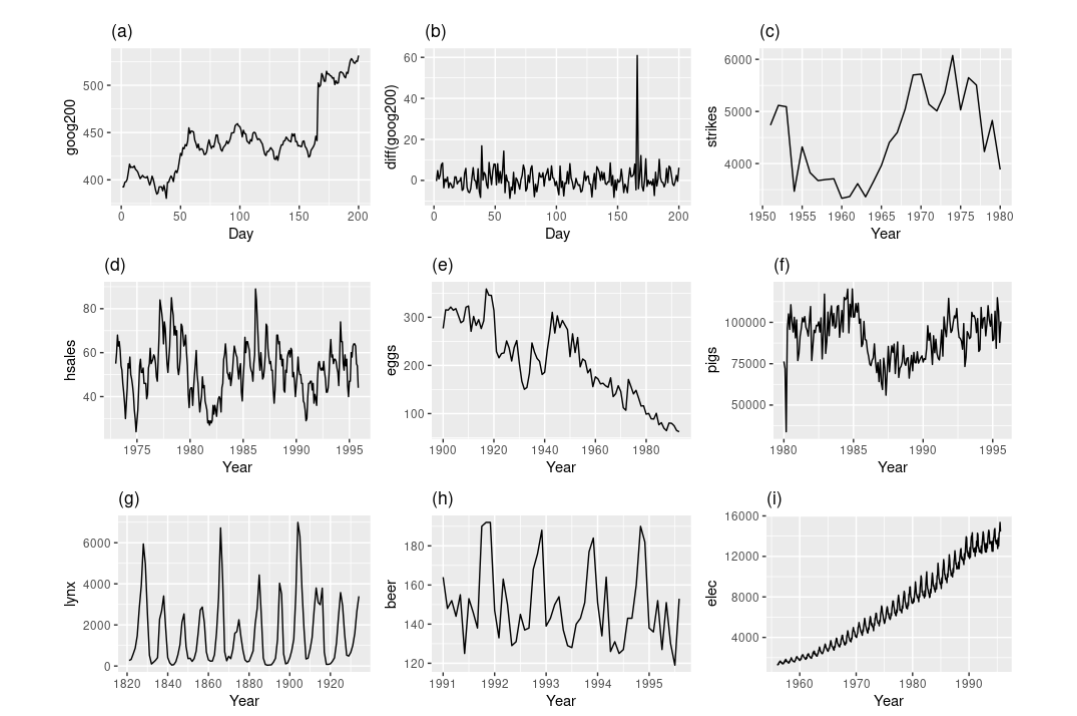

ADFULL TEST

In [ ]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]

0.9789233920172065

In [ ]:
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   print("P-Value:",pvalue)
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')

adf_test(mobile_sales.Sales)

P-Value: 0.9789233920172065
Sequence is not stationary


# PART 3

### How do we make sequence stationary

<Axes: xlabel='DATE'>

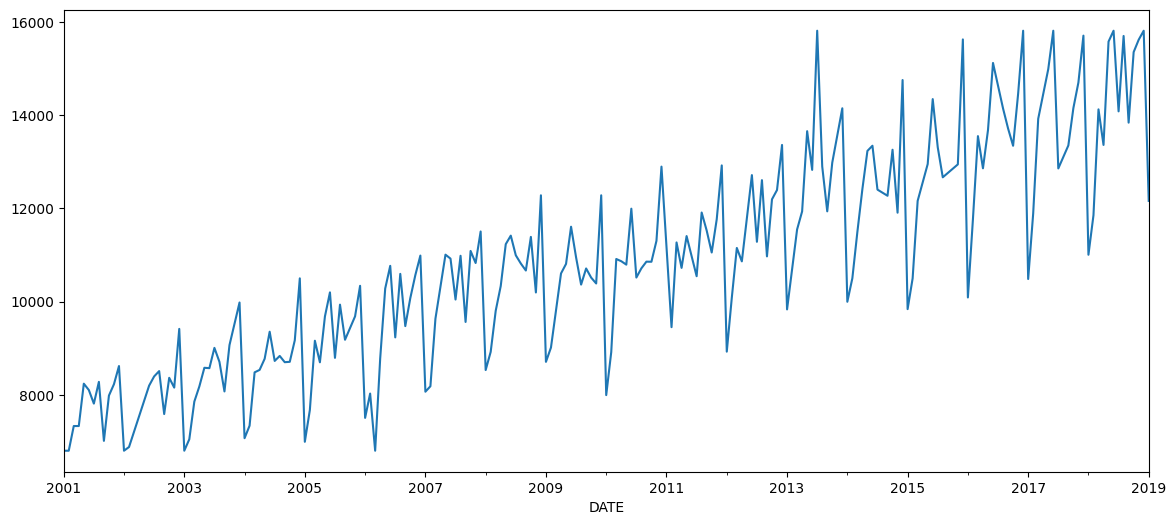

In [ ]:
mobile_sales.Sales.plot()

### Differencing

<Axes: xlabel='DATE'>

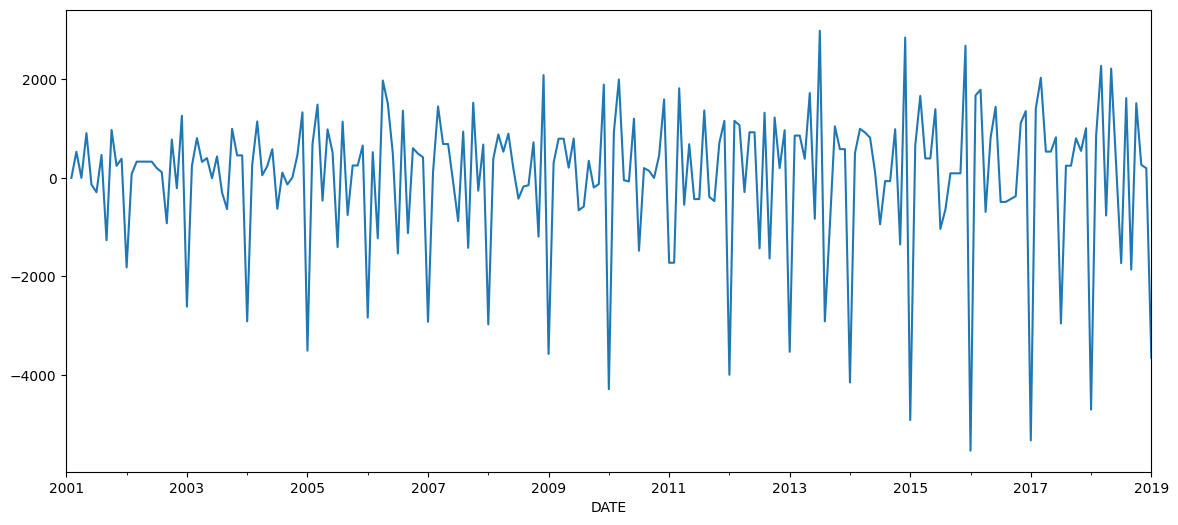

In [ ]:
detrend = mobile_sales.Sales.diff(1)
detrend.plot()

In [ ]:
detrend

DATE
2001-01-01        NaN
2001-02-01       0.00
2001-03-01     529.56
2001-04-01       0.00
2001-05-01     908.00
               ...   
2018-09-01   -1859.00
2018-10-01    1513.00
2018-11-01     264.00
2018-12-01     194.40
2019-01-01   -3649.40
Name: Sales, Length: 217, dtype: float64

In [ ]:
adf_test(detrend.dropna())

P-Value: 1.1781888996320098e-16
Sequence is stationary


<Axes: xlabel='DATE'>

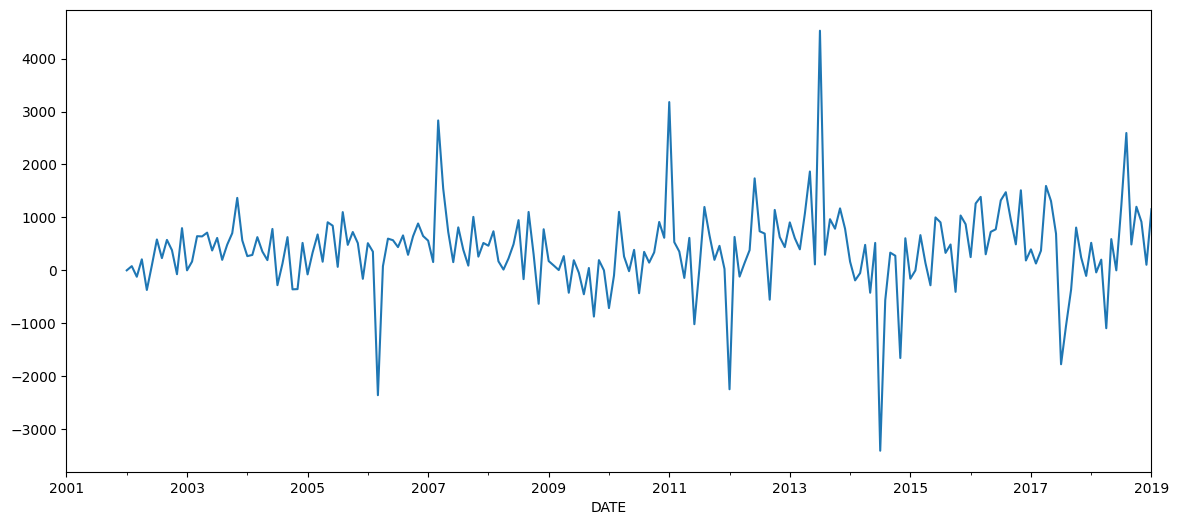

In [ ]:
deseas = mobile_sales.Sales.diff(12)
deseas.plot()

<Axes: xlabel='DATE'>

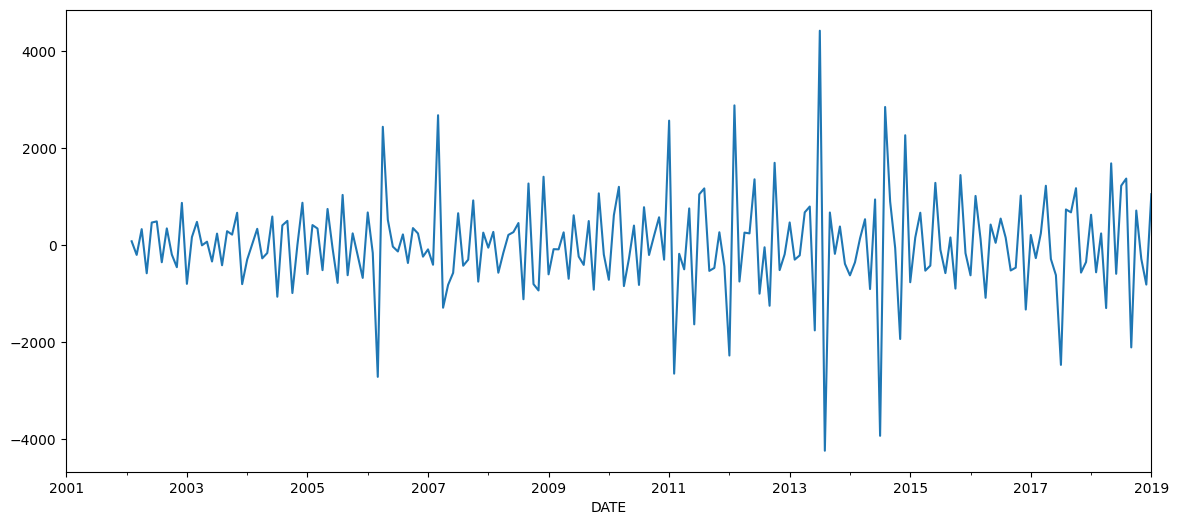

In [ ]:
### Let's remove both trend and seasonality
stationary = mobile_sales.Sales.diff(1).diff(12)
stationary.plot()

In [ ]:
adf_test(stationary.dropna())

P-Value: 1.4566207430682365e-06
Sequence is stationary


### ACF and PACF

In [ ]:
mobile_sales.Sales.head(20)

DATE
2001-01-01    6802.44
2001-02-01    6802.44
2001-03-01    7332.00
2001-04-01    7332.00
2001-05-01    8240.00
2001-06-01    8104.00
2001-07-01    7813.00
2001-08-01    8279.00
2001-09-01    7014.00
2001-10-01    7985.00
2001-11-01    8229.00
2001-12-01    8618.00
2002-01-01    6802.44
2002-02-01    6882.00
2002-03-01    7211.00
2002-04-01    7540.00
2002-05-01    7869.00
2002-06-01    8198.00
2002-07-01    8396.00
2002-08-01    8510.00
Name: Sales, dtype: float64

#### Let's shift the Time Series

In [ ]:
lag = 1
mobile_sales.Sales.shift(lag).head()

DATE
2001-01-01        NaN
2001-02-01    6802.44
2001-03-01    6802.44
2001-04-01    7332.00
2001-05-01    7332.00
Name: Sales, dtype: float64

In [ ]:
lag = 12
np.corrcoef(mobile_sales.Sales[lag:], mobile_sales.Sales.shift(lag)[lag:])[0][1]

0.9375654891790987

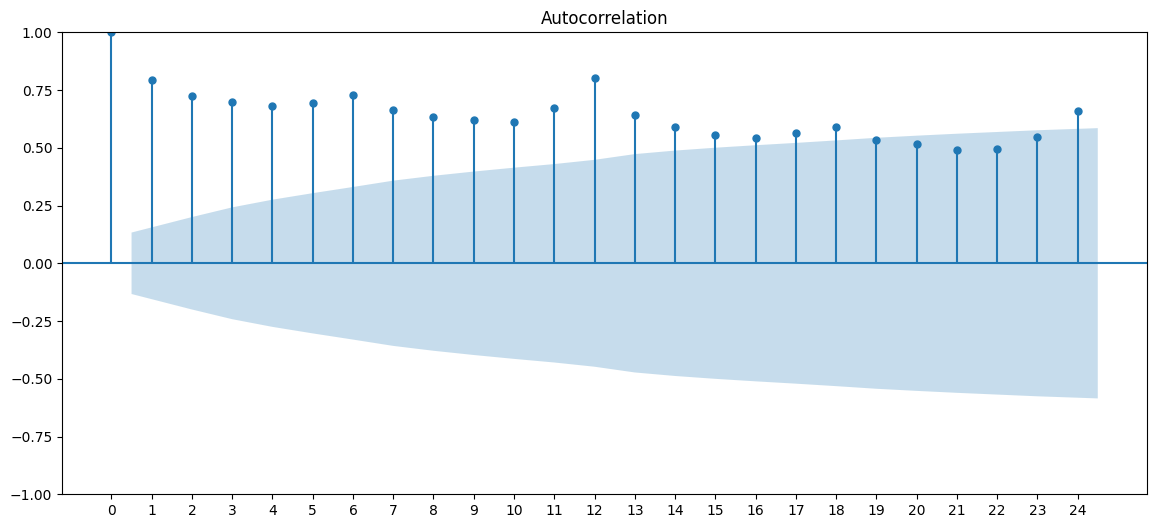

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(mobile_sales.Sales);
plt.xticks(range(25))
plt.show()

**Q. What does the blue shaded region signify?**

***significance***
The blue colour highlighted part is the **confidence interval** which gives the significance level of the correlation

#### Let's check acf for detrended series

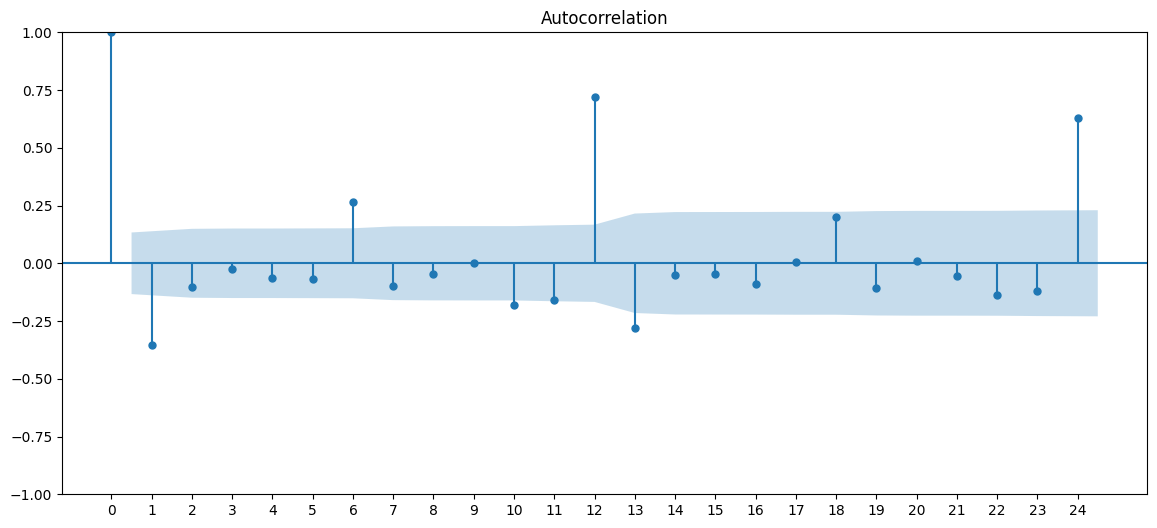

In [ ]:
### Only Seasonality and residuals: stationary
plot_acf(mobile_sales.Sales.diff().dropna())
plt.xticks(range(25))
plt.show()

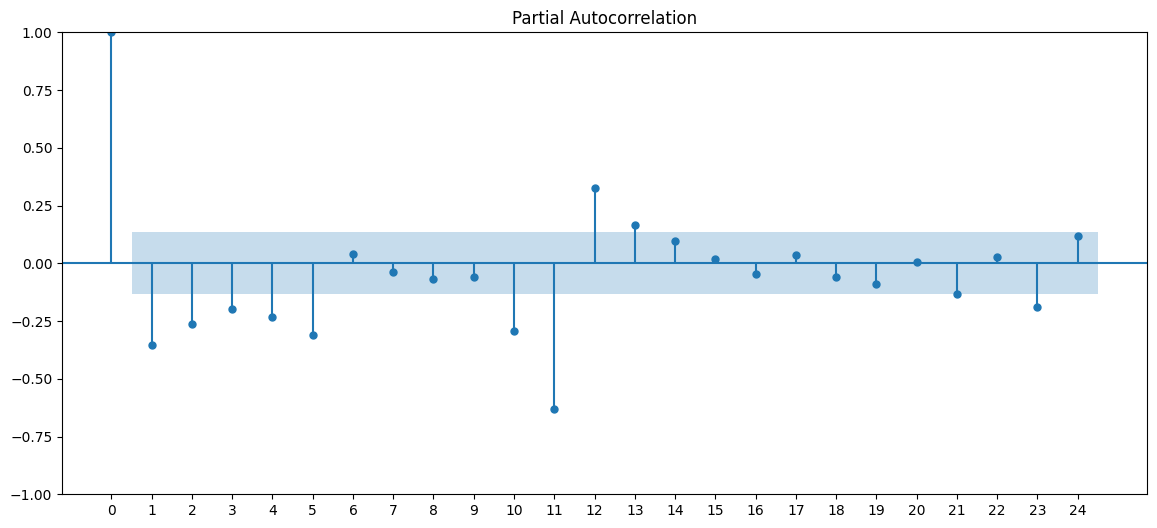

In [ ]:
### Only Seasonality and residuals
plot_pacf(mobile_sales.Sales.diff().dropna())
plt.xticks(range(25))
plt.show()

In [ ]:
plot_pacf(mobile_sales.Sales);
plt.xticks(range(25))
plt.show()

In [ ]:
plot_acf(mobile_sales.Sales);
plt.xticks(range(25))
plt.show()

## ARIMA FAMILY

### AR(p)

### let's take a fresh copy of training data and make it stationary

In [ ]:
train_x_st = train_x.copy()
adf_test(train_x_st.Sales)

P-Value: 0.9276433478668332
Sequence is not stationary


In [ ]:
train_x_st.Sales = train_x_st.Sales.diff(1)
train_x_st.dropna(inplace=True)
adf_test(train_x_st.Sales)

P-Value: 2.4233569209764007e-06
Sequence is stationary


#### Let's implement AR Model

In [ ]:
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
p = 1

model = SARIMAX(train_x_st.Sales, order=(p, 0, 0))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
test_x['pred'] = model.forecast(steps=12)

MAE : 14333.919
RMSE : 14435.141
MAPE: 0.99


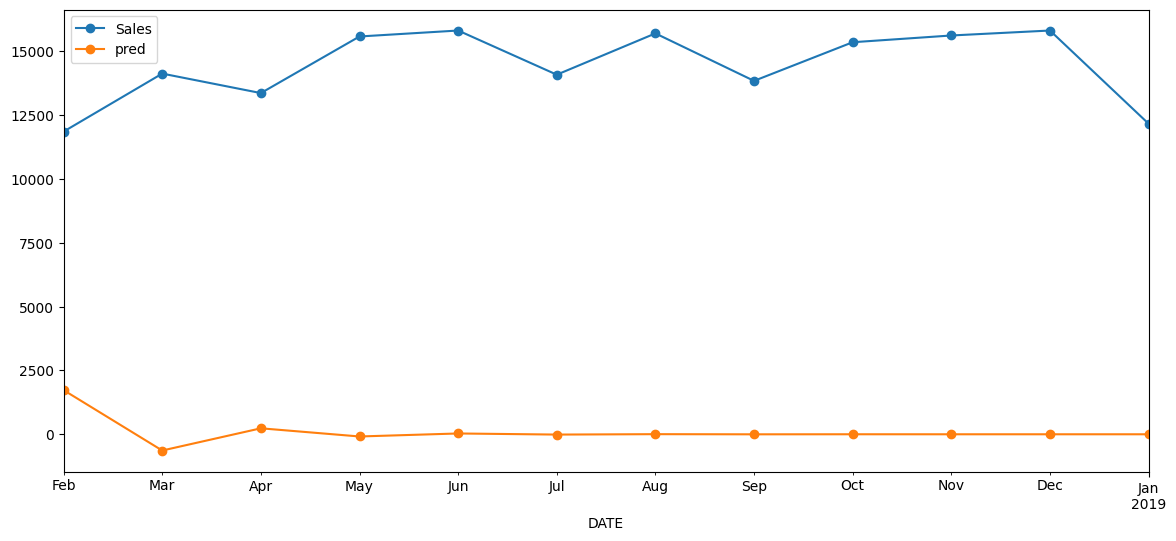

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [ ]:
test_x['pred'].head(20)

DATE
2018-02-01    1728.700558
2018-03-01    -635.966295
2018-04-01     233.963671
2018-05-01     -86.072170
2018-06-01      31.664824
2018-07-01     -11.649074
2018-08-01       4.285542
2018-09-01      -1.576595
2018-10-01       0.580009
2018-11-01      -0.213378
2018-12-01       0.078499
2019-01-01      -0.028879
Name: pred, dtype: float64

In [ ]:
train_x_st.tail()

,Sales
DATE,
2017-09-01,246.5
2017-10-01,801.0
2017-11-01,548.0
2017-12-01,1006.0
2018-01-01,-4699.0


In [ ]:
train_x.Sales[0]

6802.44

In [ ]:
# Cumsum to Integrate
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]
test_x['pred'].head()

DATE
2018-02-01    12733.700558
2018-03-01    12097.734263
2018-04-01    12331.697934
2018-05-01    12245.625763
2018-06-01    12277.290588
Name: pred, dtype: float64

MAE : 2307.213
RMSE : 2585.999
MAPE: 0.153


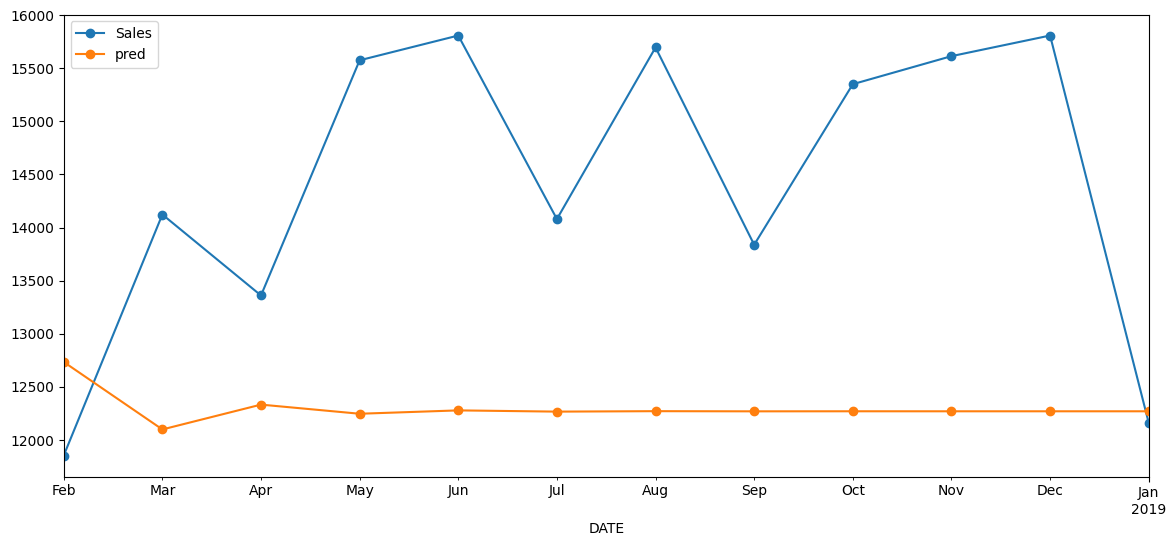

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

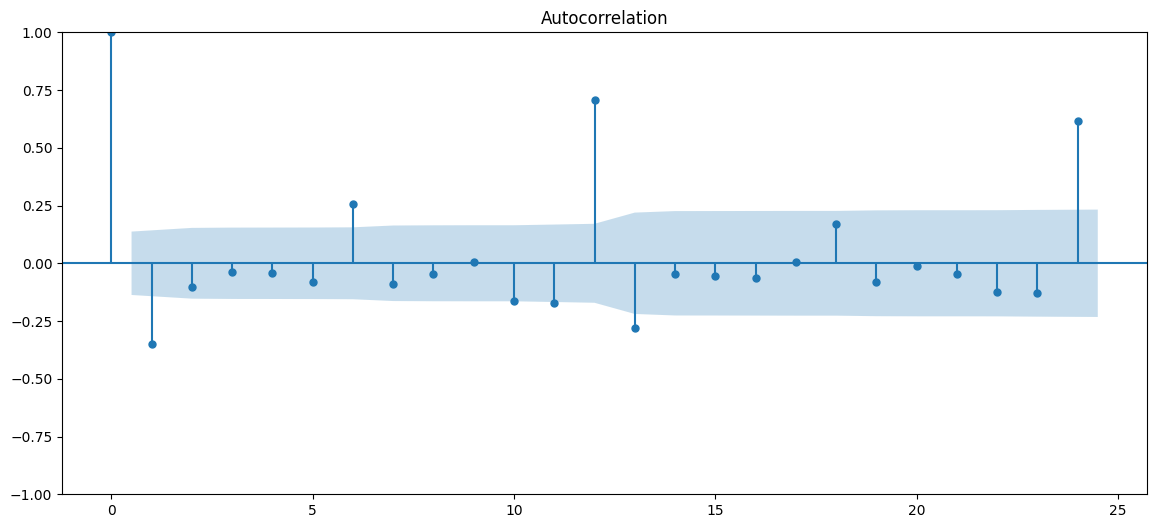

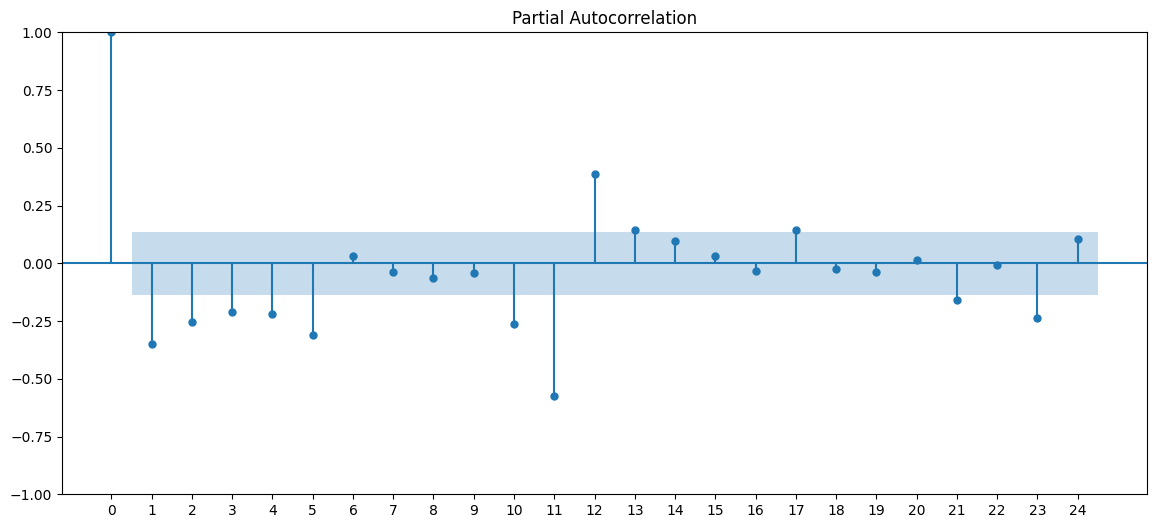

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(train_x_st.Sales);
plot_pacf(train_x_st.Sales);
plt.xticks(range(25))
plt.show()

> **GUIDE**
> - **If the ACF plot gradually decreases, and PACF plot suddenly cuts of after lag k, then we can consider AR model with order p=k**
> - Here, there is also some seasonality which we did not remove, maybe there is also some quaterly seasonality, which is why the above rule does not give a clear guess -- Human judgement call needed here

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1407.772
RMSE : 1558.462
MAPE: 0.095


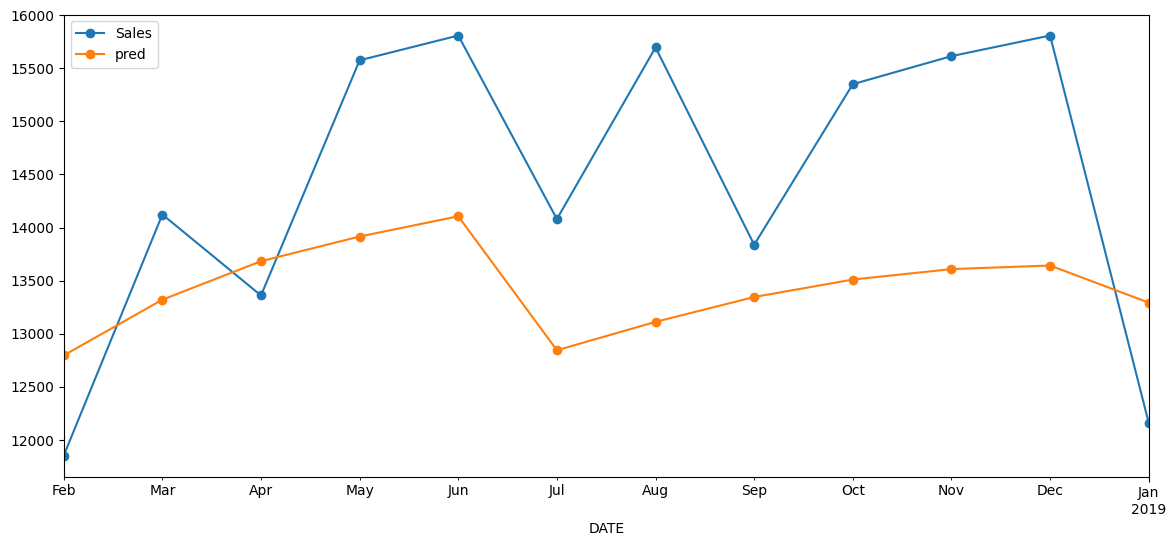

In [ ]:
# order of AR
p = 5

# Train Model
model = SARIMAX(train_x_st.Sales, order=(p, 0, 0))
model = model.fit()

# Forecast
test_x['pred'] = model.forecast(steps=12)

# Integrating the trend back!
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

# Plotting
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### MA MODEL

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1362.947
RMSE : 1558.015
MAPE: 0.093


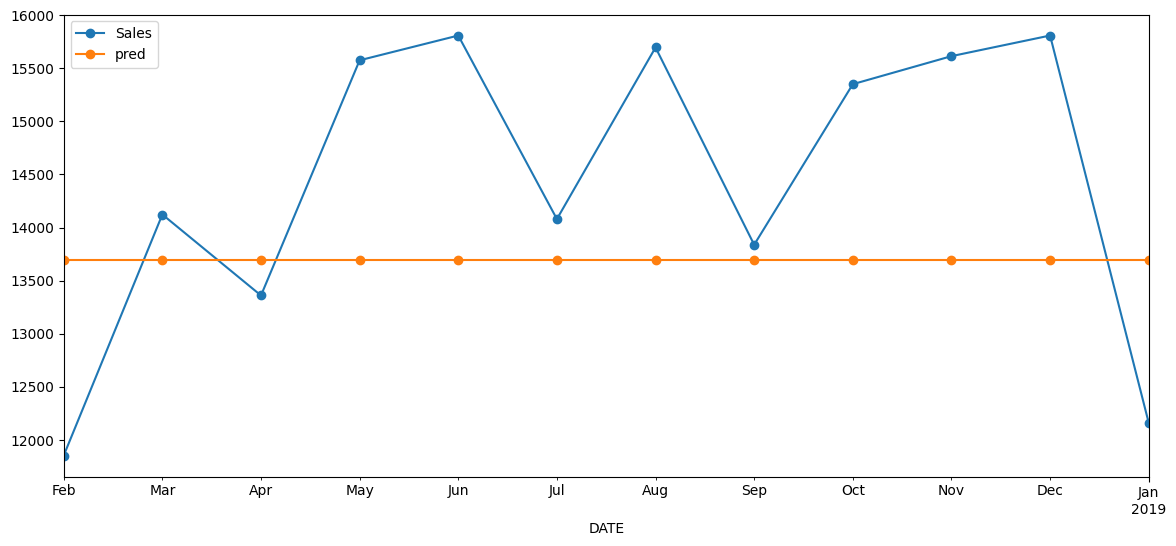

In [ ]:
# order of MA
q = 2

# Train Model: order(p,d,q)
model = SARIMAX(train_x_st.Sales, order=(0, 0, 1))
model = model.fit(disp=False)

# forecast
test_x['pred'] = model.forecast(steps=12)

# Integrating the trend back!
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

# Plotting
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

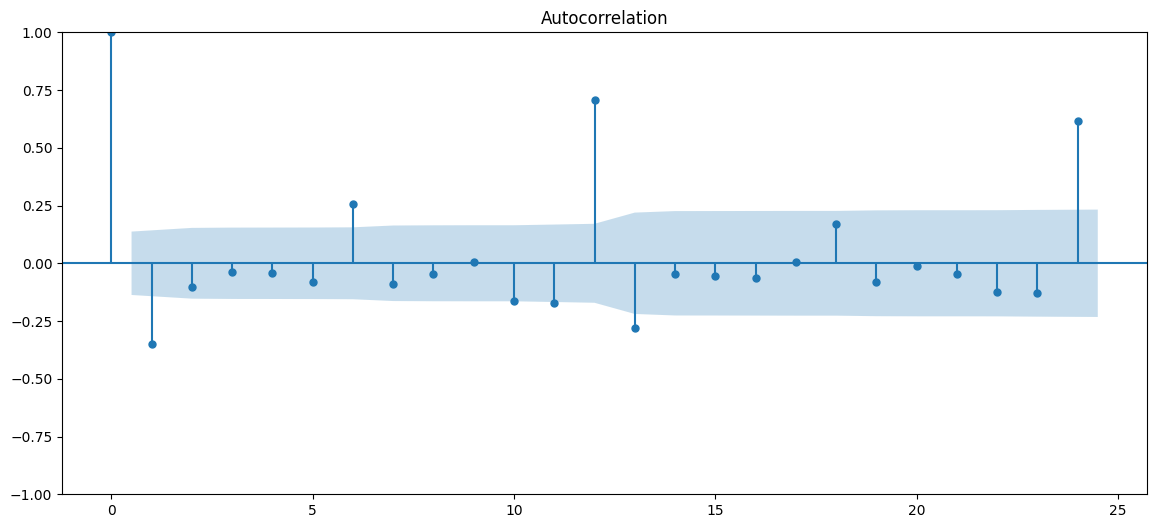

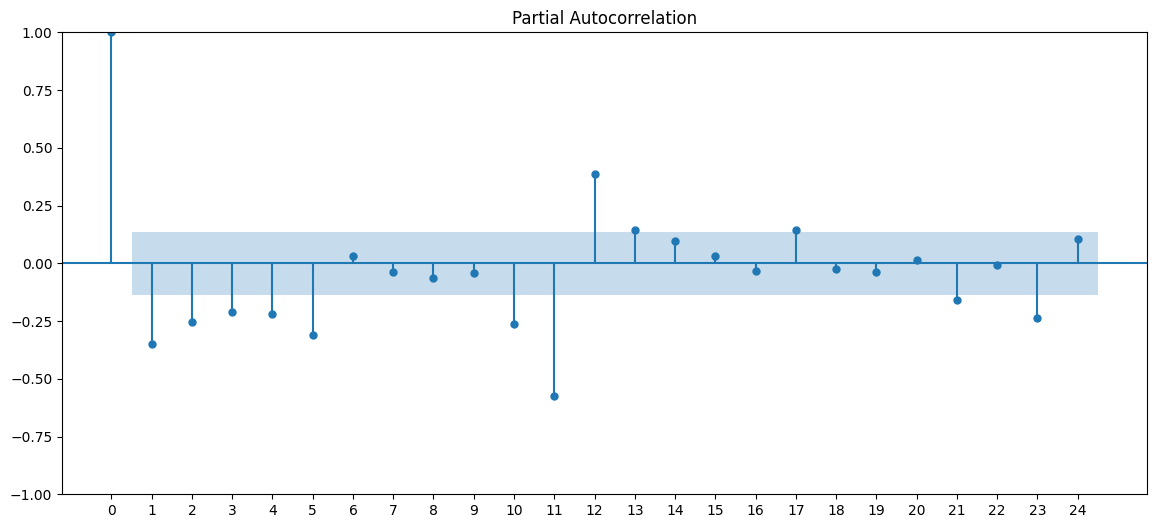

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(train_x_st.Sales);
plot_pacf(train_x_st.Sales);
plt.xticks(range(25))
plt.show()

> **GUIDE**
> - **If the PACF plot gradually decreases, and ACF plot suddenly cuts of after lag k, then we can consider MA model with order p=k**
> - Here, its not very clear and so we cannot easily judge the best MA value

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1362.947
RMSE : 1558.015
MAPE: 0.093


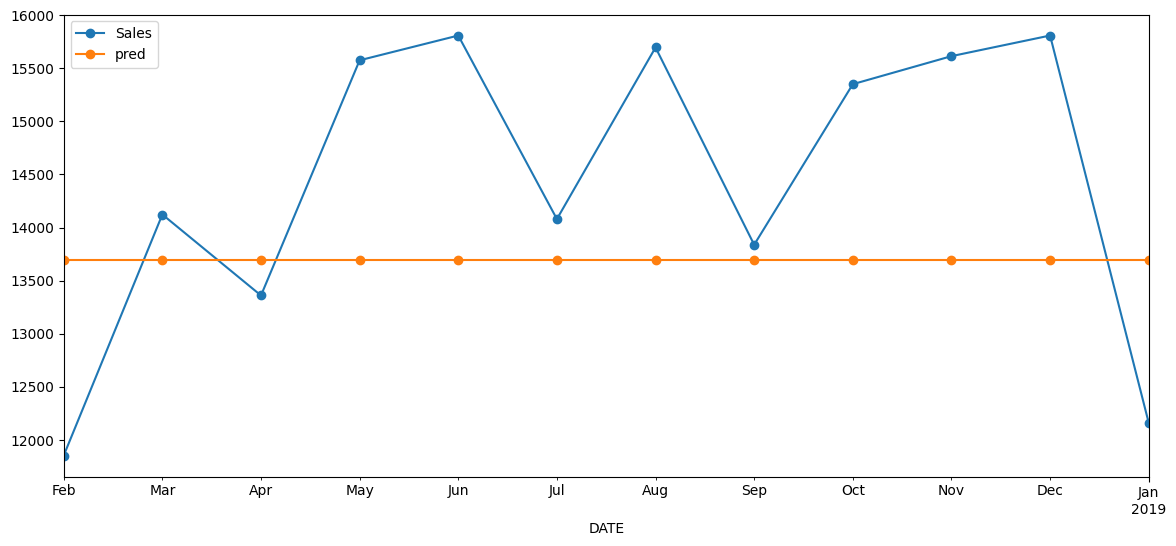

In [ ]:
# order of MA
q = 1

# Train Model
model = SARIMAX(train_x_st.Sales, order=(0, 0, 1))
model = model.fit(disp=False)

# forecast
test_x['pred'] = model.forecast(steps=12)

# Integrating the trend back!
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

# Plotting
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### ARMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1301.656
RMSE : 1470.358
MAPE: 0.089


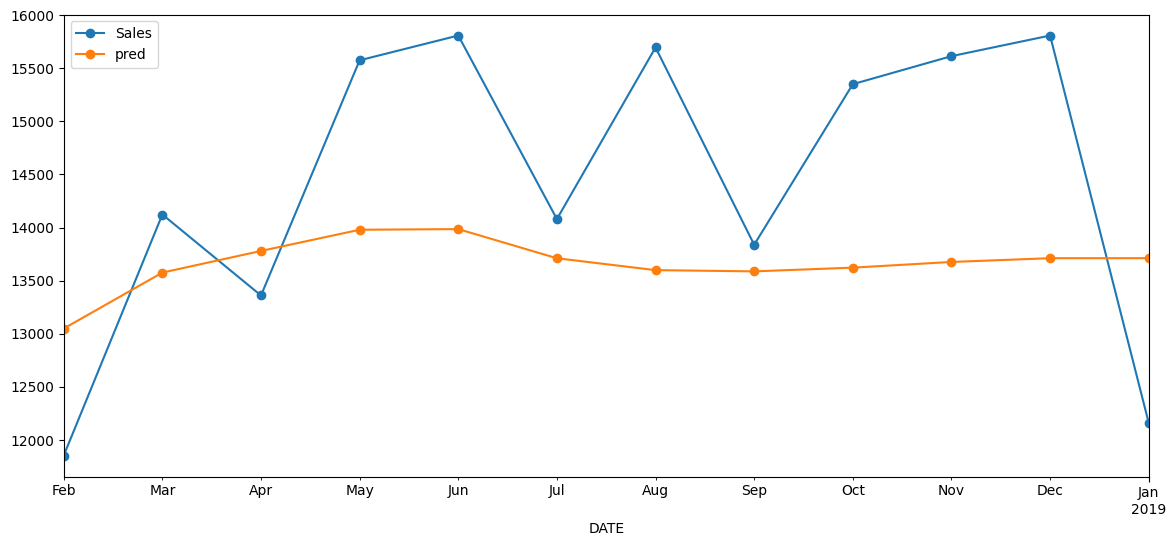

In [ ]:
p = 5
q = 1

model = SARIMAX(train_x_st.Sales, order=(p, 0, q))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)

test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1310.803
RMSE : 1481.899
MAPE: 0.089


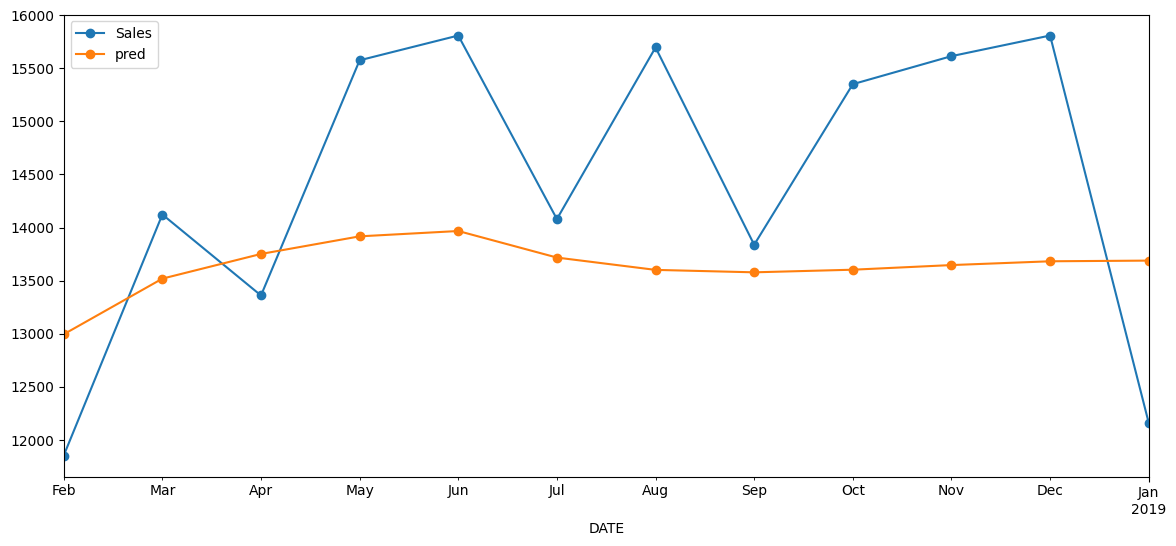

In [ ]:
p = 5
q = 1
d = 1

model = SARIMAX(train_x.Sales, order=(p, d, q))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 536.809
RMSE : 622.984
MAPE: 0.037


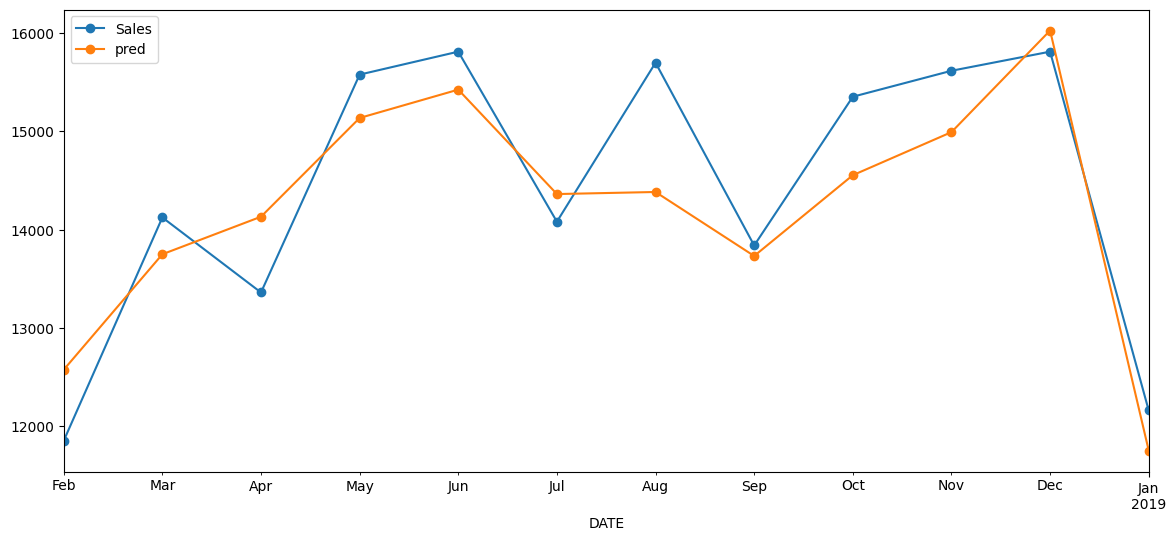

In [ ]:
# Standard Parameters
p = 3
d = 1
q = 3

## Seasonal Parameters
P = 1
D = 1
Q = 1
S = 12

model = SARIMAX(train_x.Sales, order=(p, d, q), seasonal_order=(P,D,Q,S))
model = model.fit()
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### SARIMAX